Mean Squared Error: 2900.19
R-Squared: 0.45


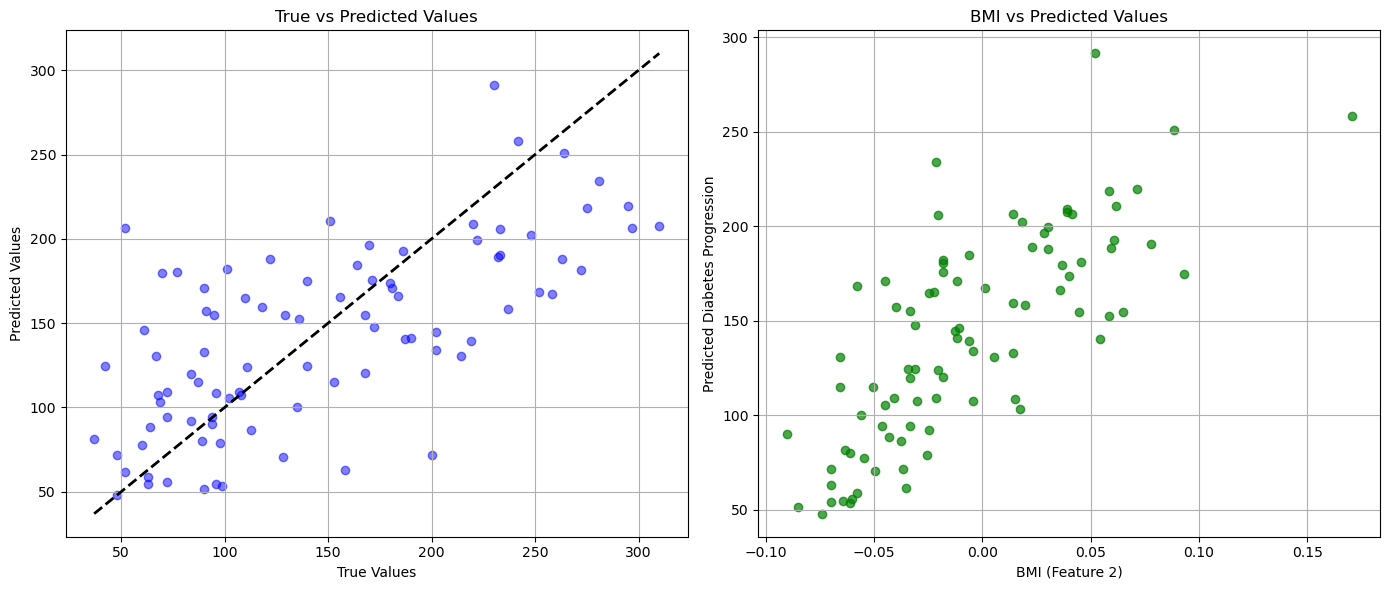

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title("True vs Predicted Values")
axs[0].set_xlabel("True Values")
axs[0].set_ylabel("Predicted Values")
axs[0].grid(True)

axs[1].scatter(X_test[:, 2], y_pred, color='green', alpha=0.7)
axs[1].set_title("BMI vs Predicted Values")
axs[1].set_xlabel("BMI (Feature 2)")
axs[1].set_ylabel("Predicted Diabetes Progression")
axs[1].grid(True)

plt.tight_layout()
plt.show()

